# Load saved models

In [8]:
from joblib import dump, load
svm = load('../model/svm.joblib')
glm = load('../model/glm.joblib')
rf = load('../model/rf.joblib')

# Load Testing Set

In [4]:
import pandas as pd
test = pd.read_csv("../data/TEST.csv")
y_test = test["SEPSIS"]
X_test = test.drop("SEPSIS", axis=1)

# Helper Function

In [11]:
from sklearn.metrics import *
def classification_metrics(Y_pred, Y_true, Y_score):
    #NOTE: It is important to provide the output in the same order
    acc = accuracy_score(Y_true,Y_pred)
    bacc = balanced_accuracy_score(Y_true, Y_pred)
    auc_ = roc_auc_score(Y_true,Y_score)
    precision = precision_score(Y_true,Y_pred)
    recall = recall_score(Y_true,Y_pred)
    f1score = f1_score(Y_true,Y_pred)
    return acc, bacc, auc_, precision, recall, f1score

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize
    cmap = plt.cm.Blues

    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title="Normalized Confusion Matrix",
           ylabel='True', xlabel='Predicted')

    # Rotate the tick labels and set alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f'
    thresh = cm.max() / 2.
    # Loop over data dimensions and create text annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    plt.show()

# Logistic Regression

In [9]:
y_pred_lr = glm.predict(X_test)
y_score_lr = glm.predict_proba(X_test)[:,1]

In [12]:
acclr, bacclr, auclr, prelr, reclr, f1lr = classification_metrics(y_pred_lr, y_test, y_score_lr)
print("Accuracy: " + str(acclr))
print("Balanced Accuracy: " + str(bacclr))
print("AUC: " + str(auclr))
print("Precision: " + str(prelr))
print("Recall: " + str(reclr))
print("F1 Score: " + str(f1lr))

Accuracy: 0.7690721649484537
Balanced Accuracy: 0.7551032956222331
AUC: 0.8173061157566814
Precision: 0.302158273381295
Recall: 0.7368421052631579
F1 Score: 0.4285714285714286


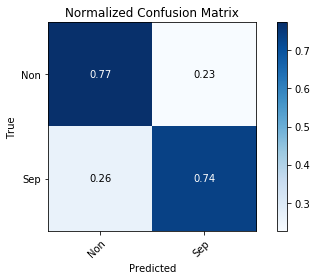

In [14]:
plot_confusion_matrix(y_test, y_pred_lr, ["Non","Sep"])

# Random Forest

In [15]:
y_pred_rf = rf.predict(X_test)
y_score_rf = rf.predict_proba(X_test)[:,1]

In [16]:
accrf, baccrf, aucrf, prerf, recrf, f1rf = classification_metrics(y_pred_rf, y_test, y_score_rf)
print("Accuracy: " + str(accrf))
print("Balanced Accuracy: " + str(baccrf))
print("AUC: " + str(aucrf))
print("Precision: " + str(prerf))
print("Recall: " + str(recrf))
print("F1 Score: " + str(f1rf))

Accuracy: 0.8391752577319588
Balanced Accuracy: 0.6959747499590097
AUC: 0.8439088375143465
Precision: 0.3670886075949367
Recall: 0.5087719298245614
F1 Score: 0.42647058823529416


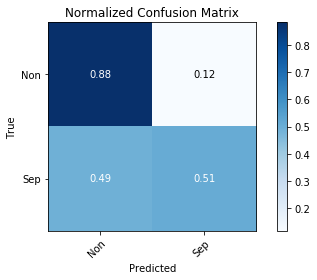

In [17]:
plot_confusion_matrix(y_test, y_pred_rf, ["Non","Sep"])

# SVM

In [19]:
y_pred_svm = svm.predict(X_test)
y_score_svm = svm.predict_proba(X_test)[:,1]

In [20]:
accsvm, baccsvm, aucsvm, presvm, recsvm, f1svm = classification_metrics(y_pred_svm, y_test, y_score_svm)
print("Accuracy: " + str(accsvm))
print("Balanced Accuracy: " + str(baccsvm))
print("AUC: " + str(aucsvm))
print("Precision: " + str(presvm))
print("Recall: " + str(recsvm))
print("F1 Score: " + str(f1svm))

Accuracy: 0.7628865979381443
Balanced Accuracy: 0.7592023282505329
AUC: 0.8198065256599442
Precision: 0.2986111111111111
Recall: 0.7543859649122807
F1 Score: 0.42786069651741293


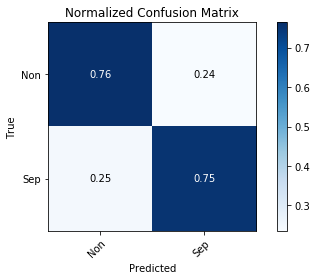

In [21]:
plot_confusion_matrix(y_test, y_pred_svm, ["Non","Sep"])